# Import Libraries

In [49]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [50]:
StatePremDF = pd.read_excel('State Premiums.xlsx')
StatePremDF.head()

,State,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductable Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)
0,Alabama,6089,18001,1453,5278,4260,1569,2563,6824
1,Alaska,8432,21648,1154,4501,3695,1797,2881,6576
2,Arizona,6229,18875,1554,5786,4834,2166,3530,8364
3,Arkansas,5974,17995,1375,5728,4661,1501,2741,7403
4,California,6542,19567,1202,5376,4127,1680,2767,6894


In [51]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [52]:
StatePremDF = pd.merge(StatePremDF, COVID, how = 'left', on = 'State')
StatePremDF.head()

,State,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductable Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
0,Alabama,6089,18001,1453,5278,4260,1569,2563,6824,26912,785
1,Alaska,8432,21648,1154,4501,3695,1797,2881,6576,751,10
2,Arizona,6229,18875,1554,5786,4834,2166,3530,8364,39298,1228
3,Arkansas,5974,17995,1375,5728,4661,1501,2741,7403,13191,188
4,California,6542,19567,1202,5376,4127,1680,2767,6894,159098,5202


In [53]:
StatePremDF.shape

(51, 11)

In [54]:
StatePremDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype 
---  ------                                                                    --------------  ----- 
 0   State                                                                     51 non-null     object
 1   Employer Sponsored Insurance Premium Costs (Single Coverage)              51 non-null     int64 
 2   Employer Sponsored Insurance Premium Costs (Family Coverage)              51 non-null     int64 
 3   Employee Contribution to Premium Costs (Single Coverage)                  51 non-null     int64 
 4   Employee Contribution to Premium Costs (Family Coverage)                  51 non-null     int64 
 5   Employee Contribution to Premium Costs (Combined Average)                 51 non-null     int64 
 6   Employee Deductible Costs (Single Coverage)                               51

In [55]:
StatePremDF.isnull().sum()

State                                                                       0
Employer Sponsored Insurance Premium Costs (Single Coverage)                0
Employer Sponsored Insurance Premium Costs (Family Coverage)                0
Employee Contribution to Premium Costs (Single Coverage)                    0
Employee Contribution to Premium Costs (Family Coverage)                    0
Employee Contribution to Premium Costs (Combined Average)                   0
Employee Deductible Costs (Single Coverage)                                 0
Employee Deductable Costs (Combined Average)                                0
Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)    0
cases                                                                       0
deaths                                                                      0
dtype: int64

In [56]:
StatePremDF.count()

State                                                                       51
Employer Sponsored Insurance Premium Costs (Single Coverage)                51
Employer Sponsored Insurance Premium Costs (Family Coverage)                51
Employee Contribution to Premium Costs (Single Coverage)                    51
Employee Contribution to Premium Costs (Family Coverage)                    51
Employee Contribution to Premium Costs (Combined Average)                   51
Employee Deductible Costs (Single Coverage)                                 51
Employee Deductable Costs (Combined Average)                                51
Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)    51
cases                                                                       51
deaths                                                                      51
dtype: int64

In [57]:
StatePremDF.describe()

,Employer Sponsored Insurance Premium Costs (Single Coverage),Employer Sponsored Insurance Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Single Coverage),Employee Contribution to Premium Costs (Family Coverage),Employee Contribution to Premium Costs (Combined Average),Employee Deductible Costs (Single Coverage),Employee Deductable Costs (Combined Average),Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible),cases,deaths
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,6718.019608,19294.294118,1419.470588,5402.921569,4373.294118,1851.411765,3026.784314,7400.078431,41994.235294,2290.549020
std,469.598701,1211.333270,209.689614,575.503982,446.825124,257.196281,384.506557,684.107765,63513.183767,4748.588326
min,5971.000000,17337.000000,755.000000,3862.000000,3159.000000,1308.000000,1855.000000,5815.000000,614.000000,10.000000
25%,6458.000000,18335.500000,1317.500000,5063.500000,4103.000000,1700.500000,2771.000000,6900.000000,9231.500000,212.000000
50%,6695.000000,19277.000000,1413.000000,5376.000000,4360.000000,1849.000000,2978.000000,7449.000000,20152.000000,704.000000
75%,6864.000000,19685.000000,1576.500000,5798.000000,4651.000000,2000.000000,3284.000000,7902.000000,46961.500000,2469.500000
max,8432.000000,22294.000000,1903.000000,6597.000000,5389.000000,2447.000000,4033.000000,8666.000000,389349.000000,30683.000000


## Pearson Correlation

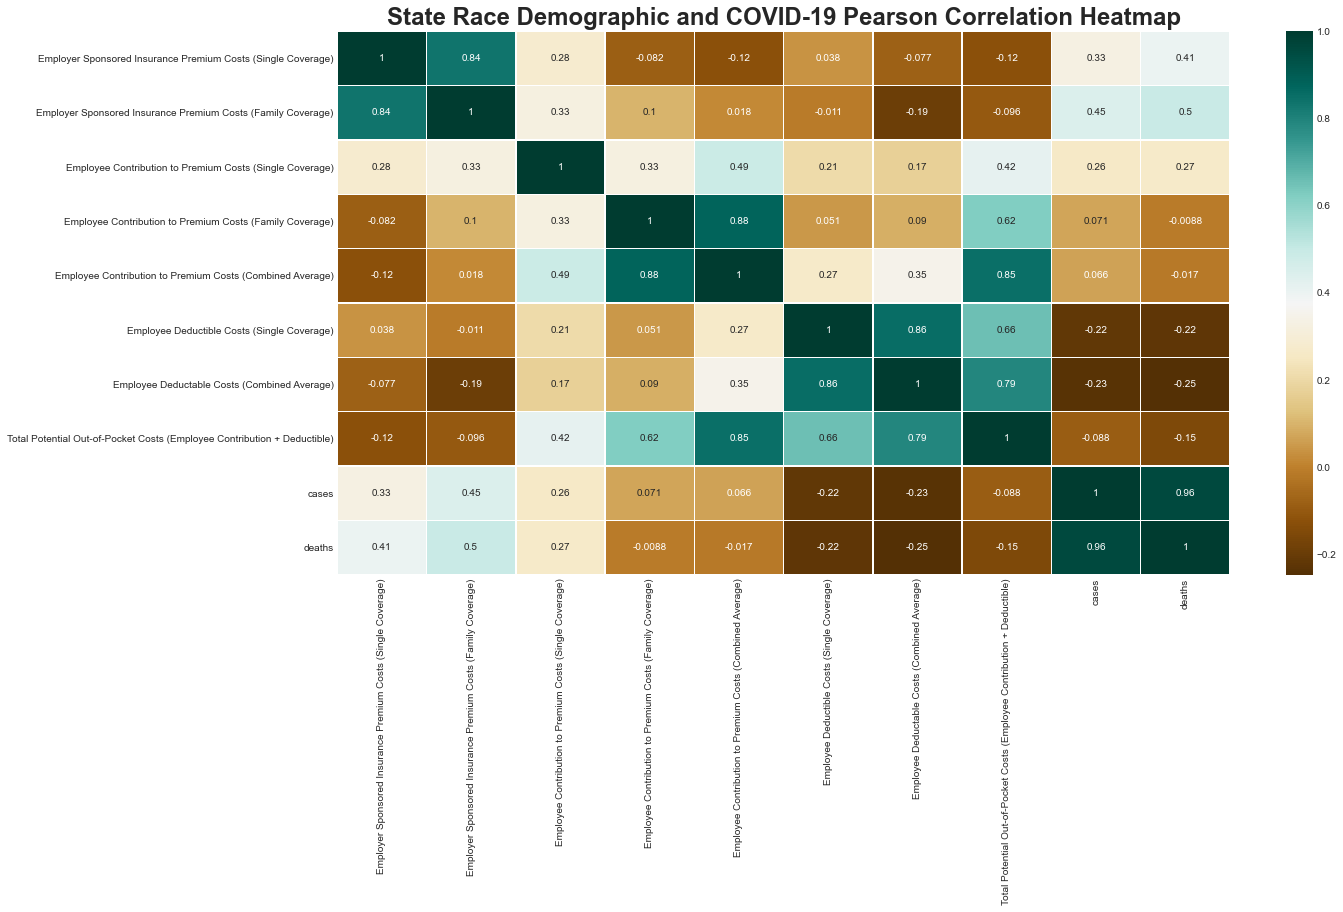

In [58]:
Pcorr = StatePremDF.corr(method = 'pearson')
Pcorr

plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Kendall Correlation

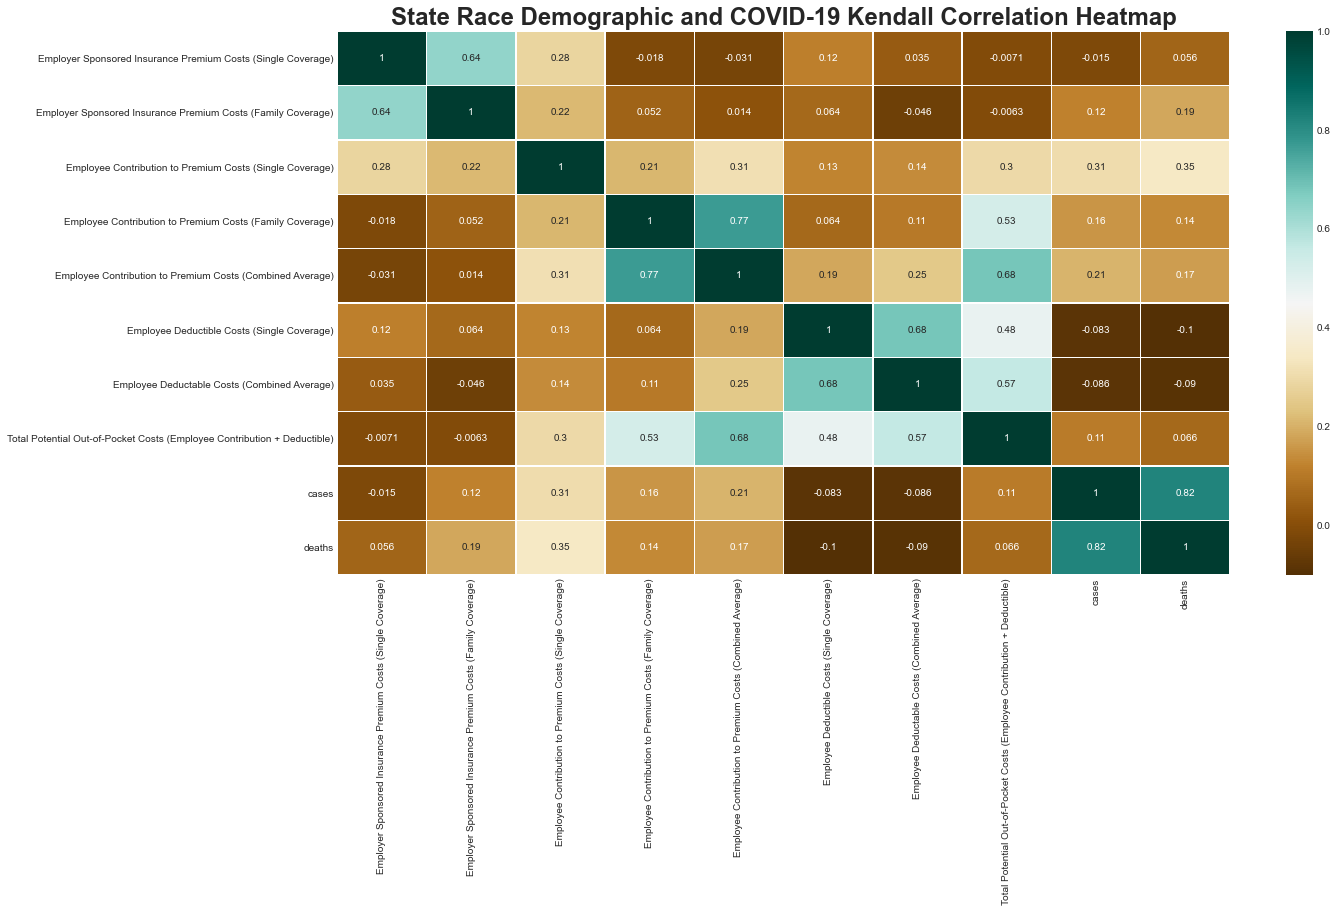

In [59]:
Kcorr = StatePremDF.corr(method = 'kendall')
Kcorr

plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 24);

## Spearman Correlation

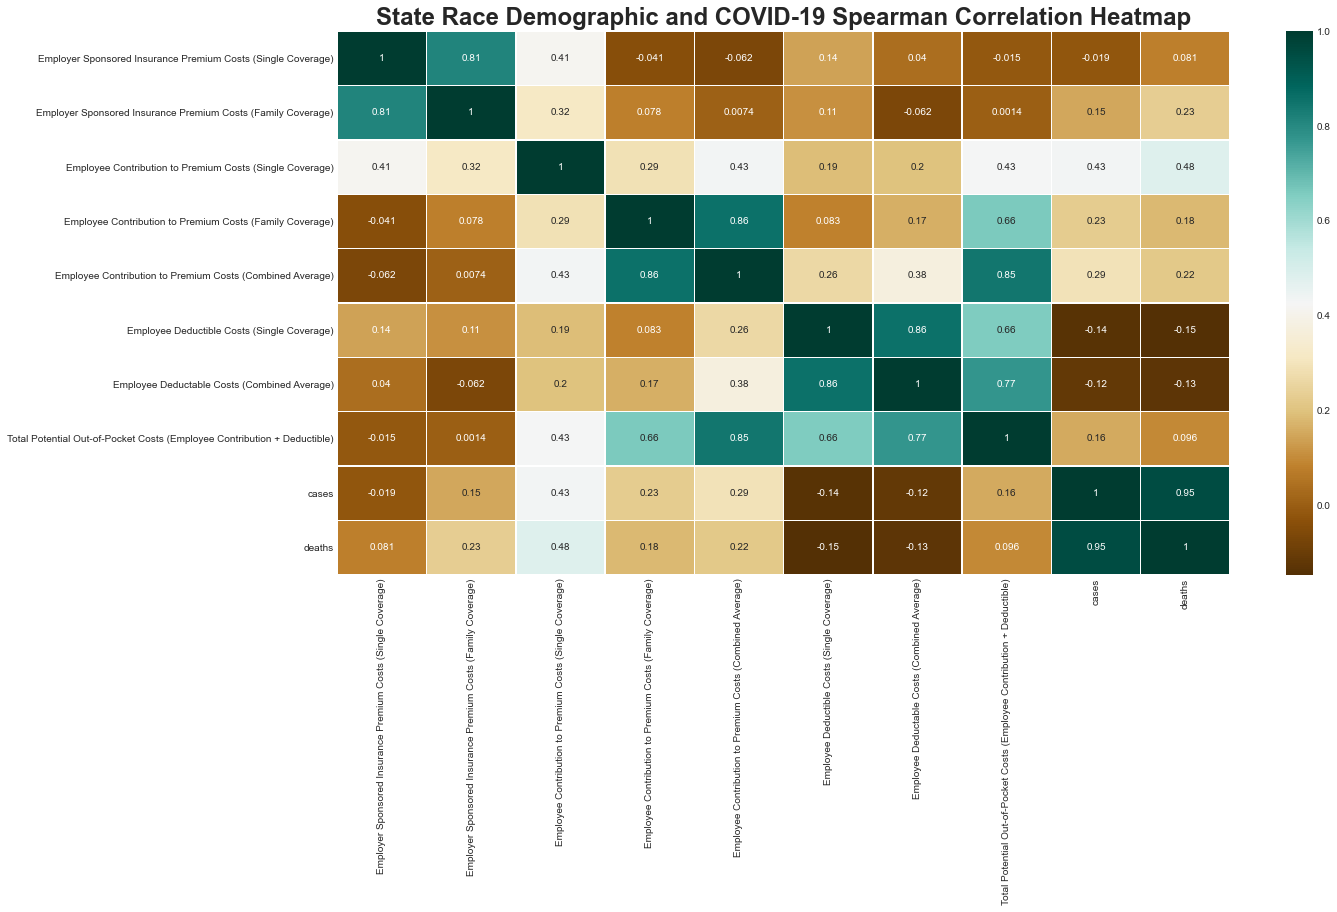

In [60]:
Scorr = StatePremDF.corr(method = 'spearman')
Scorr

plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('State Race Demographic and COVID-19 Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 24);

In [61]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['State Premium Coverage'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([8, 9])

AllCorr

,State Premium Coverage,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,Employer Sponsored Insurance Premium Costs (Si...,0.333213,-0.014902,-0.018643
1,Employer Sponsored Insurance Premium Costs (Fa...,0.448603,0.122401,0.149234
2,Employee Contribution to Premium Costs (Single...,0.264443,0.308235,0.432127
3,Employee Contribution to Premium Costs (Family...,0.071064,0.156078,0.228597
4,Employee Contribution to Premium Costs (Combin...,0.066188,0.206275,0.293122
5,Employee Deductible Costs (Single Coverage),-0.216525,-0.083170,-0.136926
6,Employee Deductable Costs (Combined Average),-0.234193,-0.086376,-0.115076
7,Total Potential Out-of-Pocket Costs (Employee ...,-0.088249,0.110588,0.155475


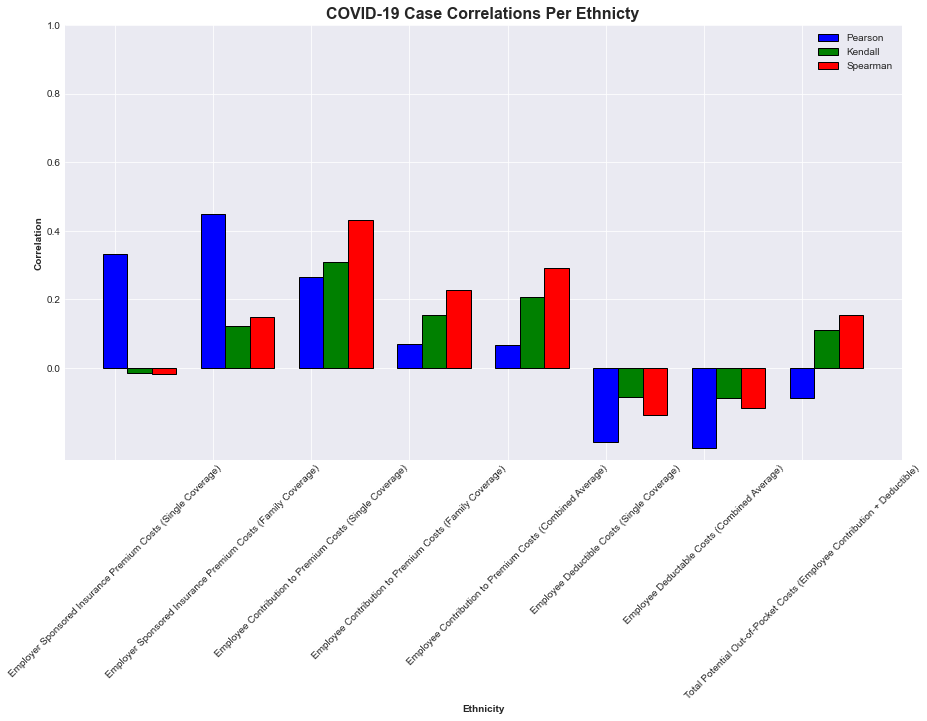

In [62]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['State Premium Coverage'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Ethnicty', fontsize = 16, fontweight = 'bold')

plt.xlabel('Ethnicity', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

## Employer Sponsored Insurance Premium Costs (Single Coverage)

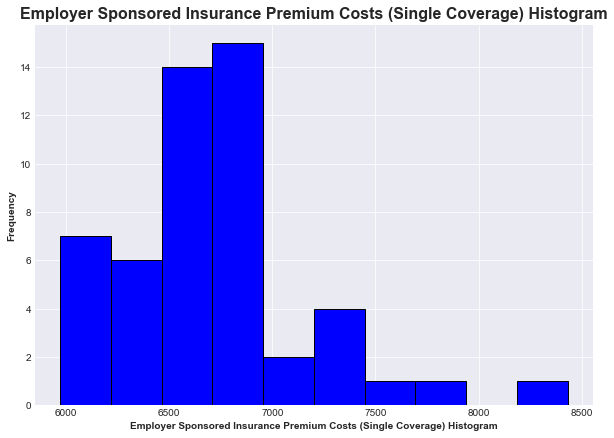

In [63]:
StatePremDF['Employer Sponsored Insurance Premium Costs (Single Coverage)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employer Sponsored Insurance Premium Costs (Single Coverage) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employer Sponsored Insurance Premium Costs (Single Coverage) Histogram', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

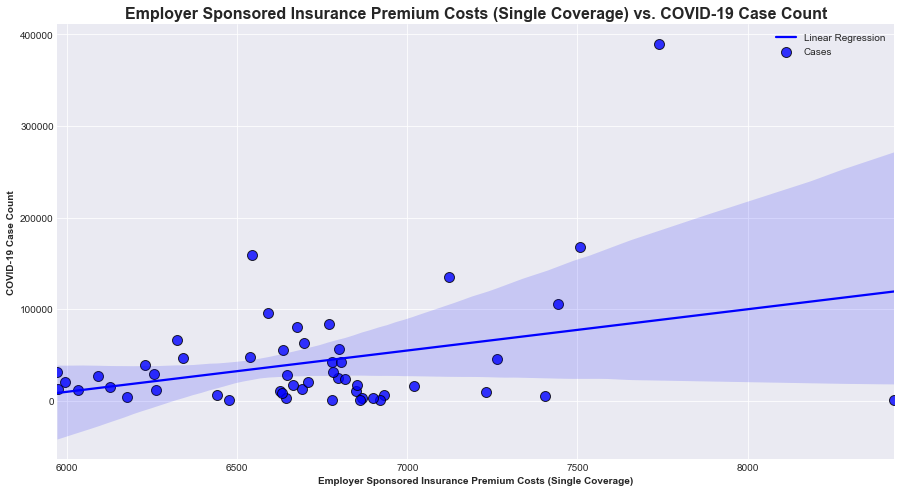

In [64]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employer Sponsored Insurance Premium Costs (Single Coverage)', y = 'cases', data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employer Sponsored Insurance Premium Costs (Single Coverage) vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employer Sponsored Insurance Premium Costs (Single Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [65]:
model1 = sm.OLS(StatePremDF['cases'], StatePremDF['Employer Sponsored Insurance Premium Costs (Single Coverage)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.328
Model:                            OLS   Adj. R-squared (uncentered):              0.315
Method:                 Least Squares   F-statistic:                              24.46
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    8.97e-06
Time:                        19:24:11   Log-Likelihood:                         -635.12
No. Observations:                  51   AIC:                                      1272.
Df Residuals:                      50   BIC:                                      1274.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Employer Sponsored Insurance Premium Costs (Single Coverage)     6.4360      1.301      4.946      0.000       3.822       9.050
==============================================================================
Omnibus:                       68.497   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.061
Skew:                           3.554   Prob(JB):                    2.52e-137
Kurtosis:                      18.669   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

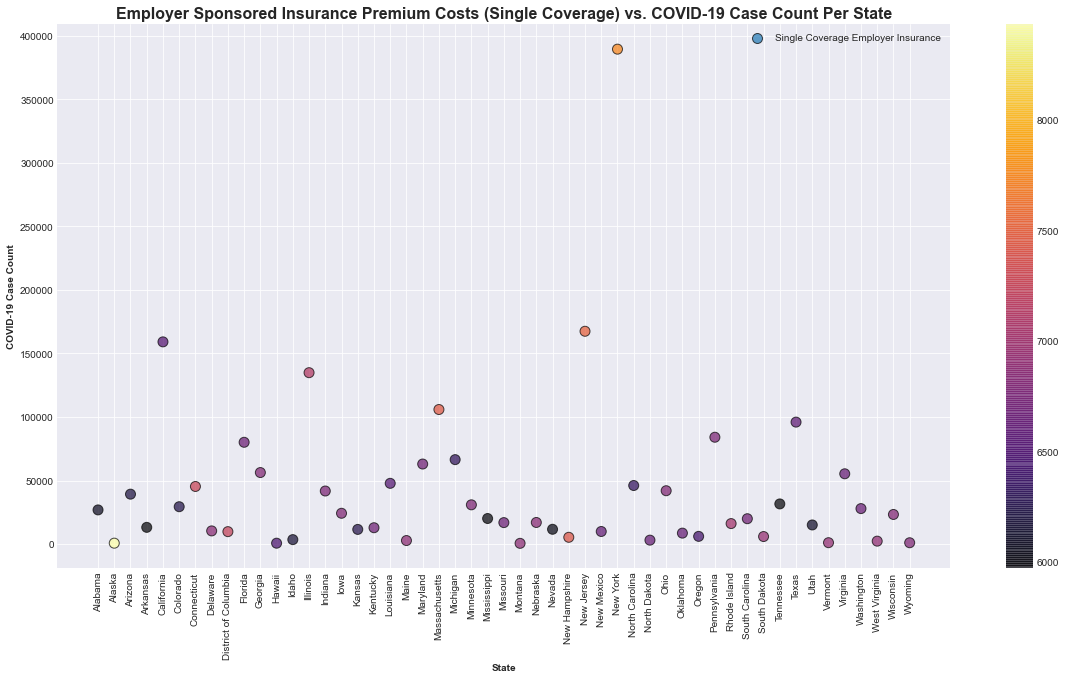

In [66]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Employer Sponsored Insurance Premium Costs (Single Coverage)'], cmap = 'inferno')
plt.title('Employer Sponsored Insurance Premium Costs (Single Coverage) vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Single Coverage Employer Insurance'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Employer Sponsored Insurance Premium Costs (Family Coverage)

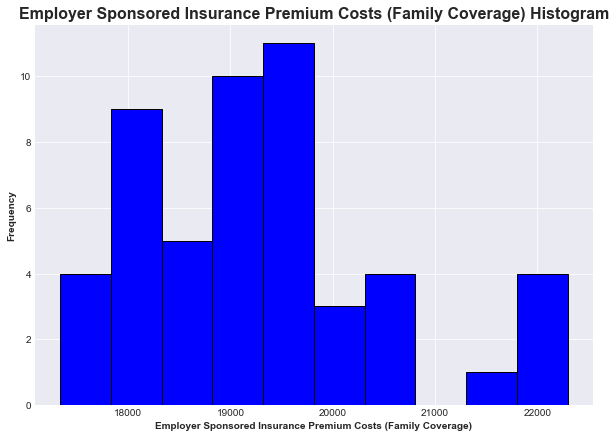

In [67]:
StatePremDF['Employer Sponsored Insurance Premium Costs (Family Coverage)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employer Sponsored Insurance Premium Costs (Family Coverage) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employer Sponsored Insurance Premium Costs (Family Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

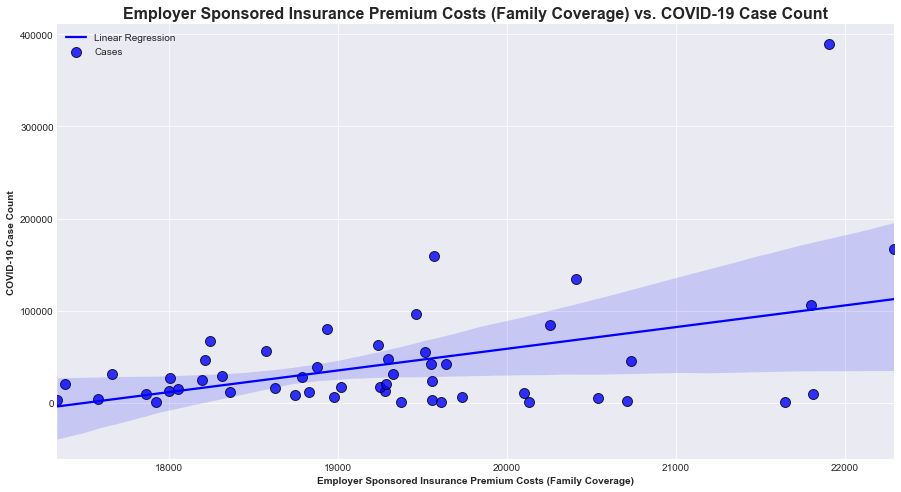

In [68]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employer Sponsored Insurance Premium Costs (Family Coverage)', y = 'cases', 
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employer Sponsored Insurance Premium Costs (Family Coverage) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Employer Sponsored Insurance Premium Costs (Family Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [69]:
model2 = sm.OLS(StatePremDF['cases'], StatePremDF['Employer Sponsored Insurance Premium Costs (Family Coverage)']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.320
Method:                 Least Squares   F-statistic:                              25.01
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    7.41e-06
Time:                        19:24:13   Log-Likelihood:                         -634.93
No. Observations:                  51   AIC:                                      1272.
Df Residuals:                      50   BIC:                                      1274.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Employer Sponsored Insurance Premium Costs (Family Coverage)     2.2587      0.452      5.001      0.000       1.351       3.166
==============================================================================
Omnibus:                       69.403   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              658.881
Skew:                           3.605   Prob(JB):                    8.43e-144
Kurtosis:                      19.065   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

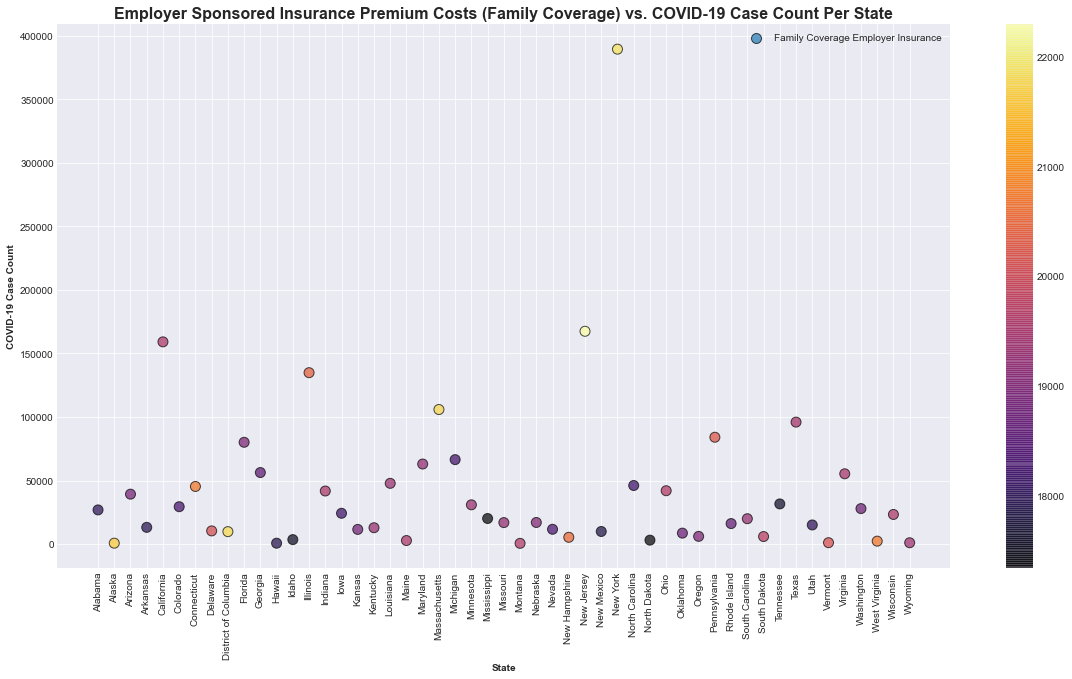

In [70]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100,
            c = StatePremDF['Employer Sponsored Insurance Premium Costs (Family Coverage)'], cmap = 'inferno')
plt.title('Employer Sponsored Insurance Premium Costs (Family Coverage) vs. COVID-19 Case Count Per State',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Family Coverage Employer Insurance'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Employee Contribution to Premium Costs (Single Coverage)

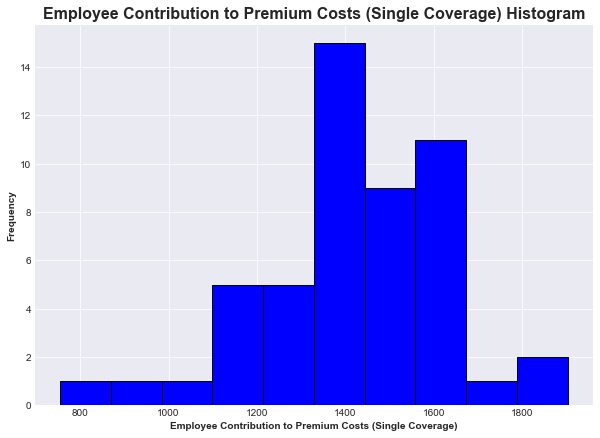

In [71]:
StatePremDF['Employee Contribution to Premium Costs (Single Coverage)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employee Contribution to Premium Costs (Single Coverage) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Contribution to Premium Costs (Single Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

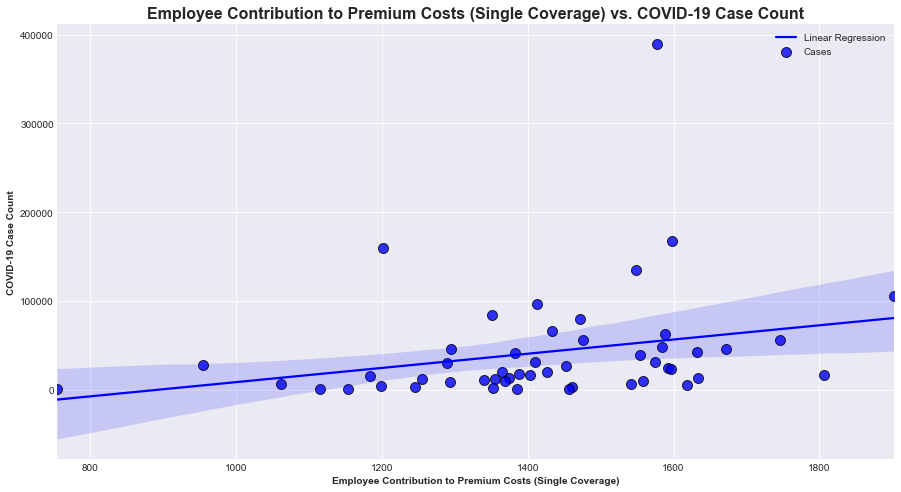

In [72]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employee Contribution to Premium Costs (Single Coverage)', y = 'cases',
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employee Contribution to Premium Costs (Single Coverage) vs. COVID-19 Case Count',
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Contribution to Premium Costs (Single Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [73]:
model3 = sm.OLS(StatePremDF['cases'], StatePremDF['Employee Contribution to Premium Costs (Single Coverage)']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.338
Model:                            OLS   Adj. R-squared (uncentered):              0.325
Method:                 Least Squares   F-statistic:                              25.52
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    6.21e-06
Time:                        19:24:15   Log-Likelihood:                         -634.76
No. Observations:                  51   AIC:                                      1272.
Df Residuals:                      50   BIC:                                      1273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Employee Contribution to Premium Costs (Single Coverage)    30.6425      6.066      5.052      0.000      18.459      42.826
==============================================================================
Omnibus:                       70.976   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.015
Skew:                           3.707   Prob(JB):                    2.20e-153
Kurtosis:                      19.610   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

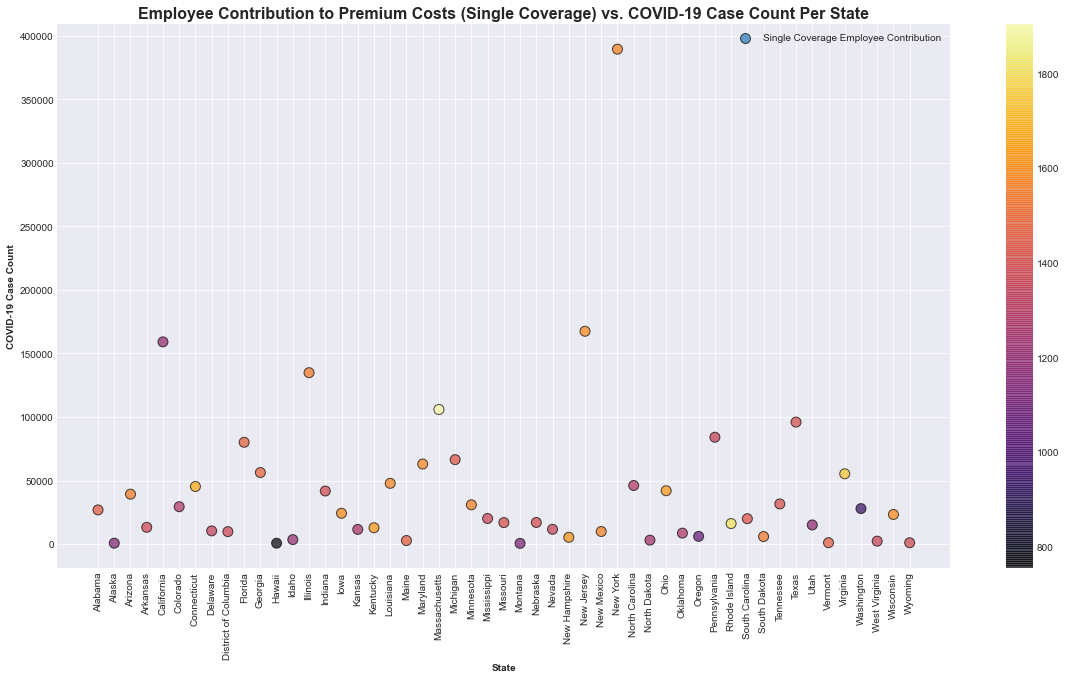

In [74]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Employee Contribution to Premium Costs (Single Coverage)'], cmap = 'inferno')
plt.title('Employee Contribution to Premium Costs (Single Coverage) vs. COVID-19 Case Count Per State', fontsize = 16,
          fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Single Coverage Employee Contribution'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Employee Contribution to Premium Costs (Family Coverage)

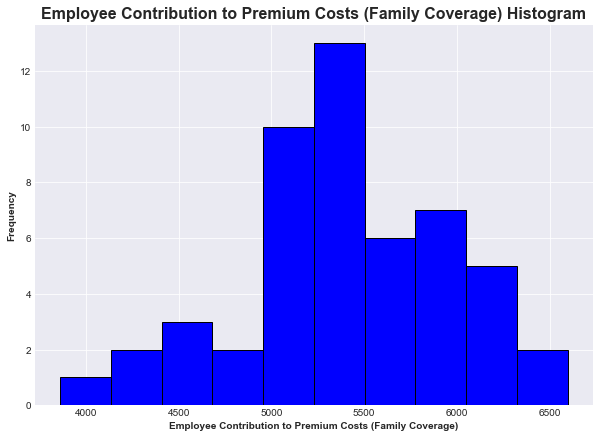

In [75]:
StatePremDF['Employee Contribution to Premium Costs (Family Coverage)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employee Contribution to Premium Costs (Family Coverage) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Contribution to Premium Costs (Family Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

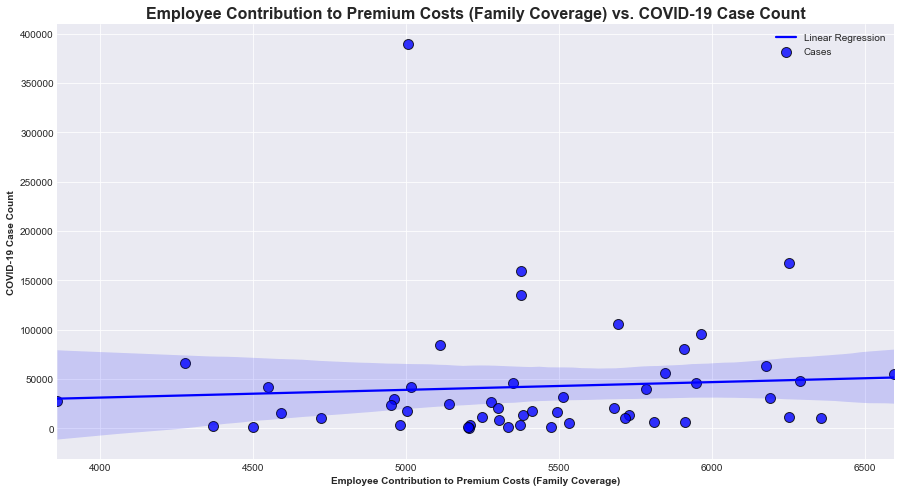

In [76]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employee Contribution to Premium Costs (Family Coverage)', y = 'cases',
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employee Contribution to Premium Costs (Family Coverage) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Contribution to Premium Costs (Family Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [77]:
model4 = sm.OLS(StatePremDF['cases'], StatePremDF['Employee Contribution to Premium Costs (Family Coverage)']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.312
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              22.66
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    1.69e-05
Time:                        19:24:17   Log-Likelihood:                         -635.74
No. Observations:                  51   AIC:                                      1273.
Df Residuals:                      50   BIC:                                      1275.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Employee Contribution to Premium Costs (Family Coverage)     7.7733      1.633      4.761      0.000       4.494      11.053
==============================================================================
Omnibus:                       71.066   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.078
Skew:                           3.703   Prob(JB):                    8.71e-156
Kurtosis:                      19.769   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

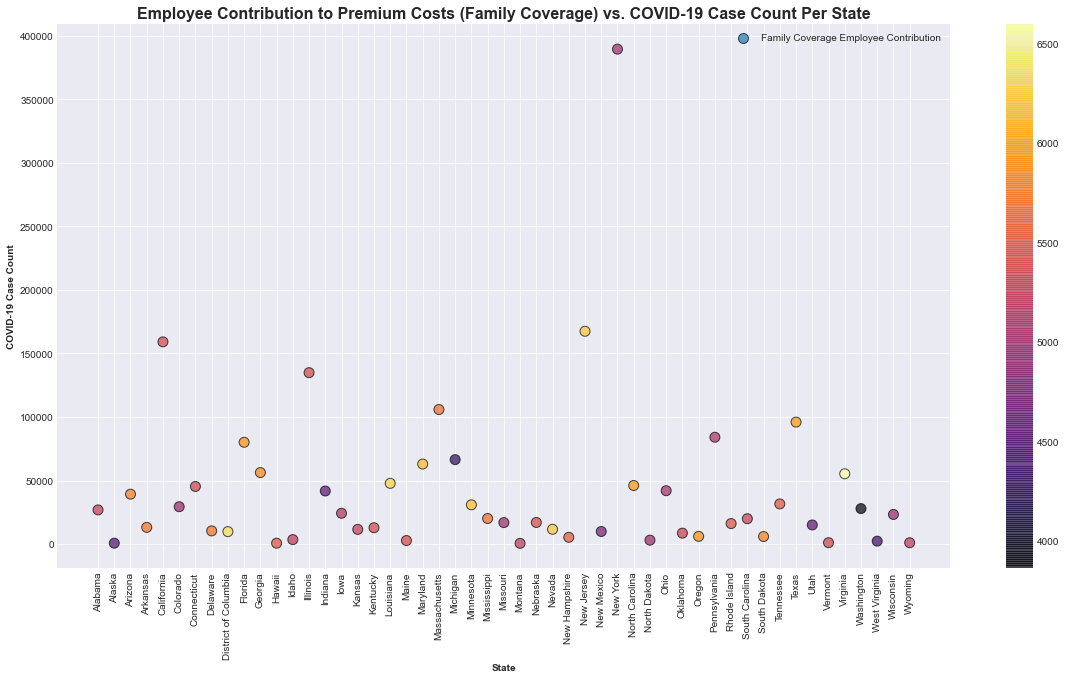

In [78]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Employee Contribution to Premium Costs (Family Coverage)'], cmap = 'inferno')
plt.title('Employee Contribution to Premium Costs (Family Coverage) vs. COVID-19 Case Count Per State', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Family Coverage Employee Contribution'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Employee Contribution to Premium Costs (Combined Average)

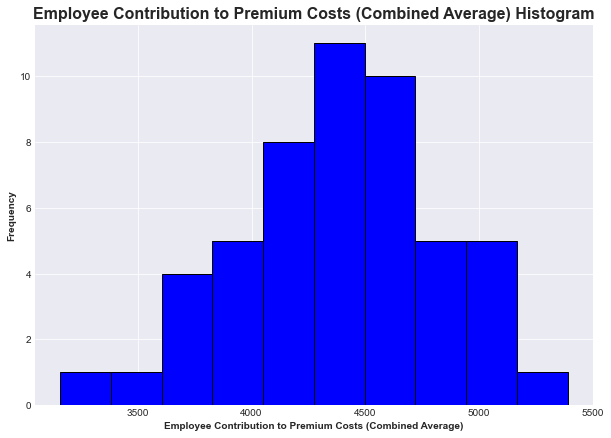

In [79]:
StatePremDF['Employee Contribution to Premium Costs (Combined Average)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employee Contribution to Premium Costs (Combined Average) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Contribution to Premium Costs (Combined Average)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

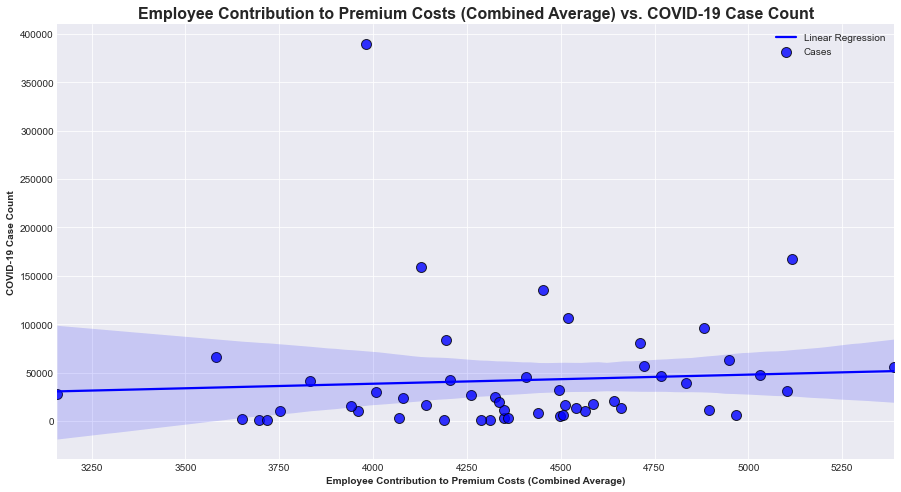

In [80]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employee Contribution to Premium Costs (Combined Average)', y = 'cases',
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employee Contribution to Premium Costs (Combined Average) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Contribution to Premium Costs (Combined Average)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [81]:
model5 = sm.OLS(StatePremDF['cases'], StatePremDF['Employee Contribution to Premium Costs (Combined Average)']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.311
Model:                            OLS   Adj. R-squared (uncentered):              0.298
Method:                 Least Squares   F-statistic:                              22.61
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    1.72e-05
Time:                        19:24:19   Log-Likelihood:                         -635.76
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1275.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Employee Contribution to Premium Costs (Combined Average)     9.6005      2.019      4.755      0.000       5.545      13.655
==============================================================================
Omnibus:                       71.420   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              724.792
Skew:                           3.726   Prob(JB):                    4.11e-158
Kurtosis:                      19.898   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

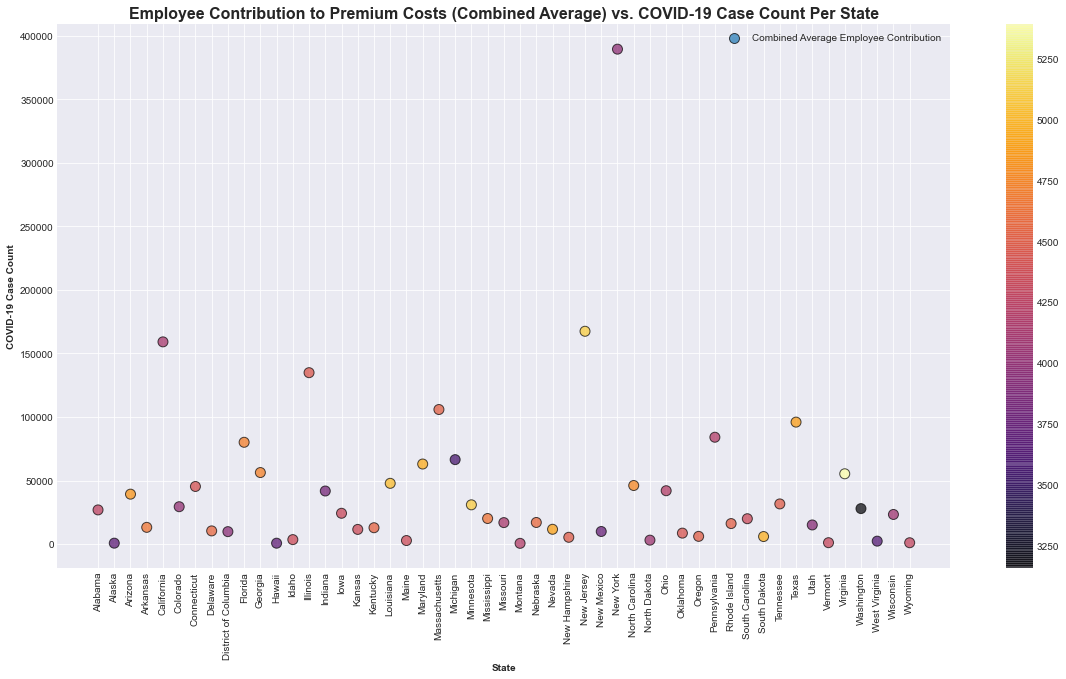

In [82]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Employee Contribution to Premium Costs (Combined Average)'], cmap = 'inferno')
plt.title('Employee Contribution to Premium Costs (Combined Average) vs. COVID-19 Case Count Per State', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Combined Average Employee Contribution'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Employee Deductible Costs (Single Coverage)

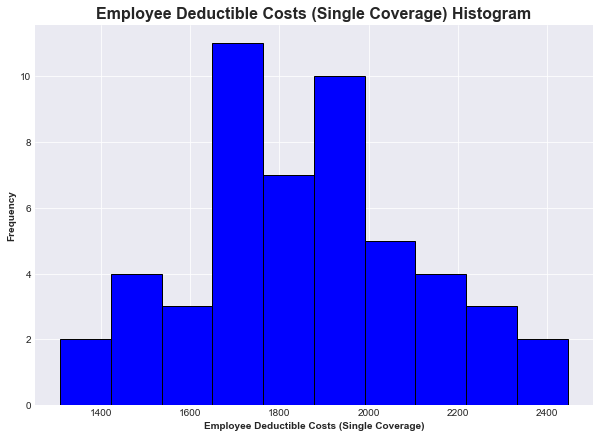

In [83]:
StatePremDF['Employee Deductible Costs (Single Coverage)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employee Deductible Costs (Single Coverage) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Deductible Costs (Single Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

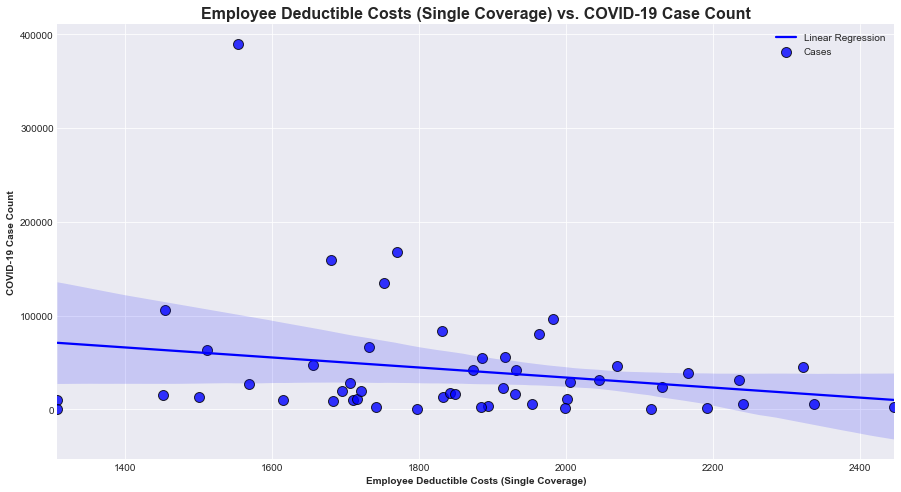

In [84]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employee Deductible Costs (Single Coverage)', y = 'cases',
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employee Deductible Costs (Single Coverage) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Deductible Costs (Single Coverage)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [85]:
model6 = sm.OLS(StatePremDF['cases'], StatePremDF['Employee Deductible Costs (Single Coverage)']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.276
Model:                            OLS   Adj. R-squared (uncentered):              0.262
Method:                 Least Squares   F-statistic:                              19.09
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    6.30e-05
Time:                        19:24:21   Log-Likelihood:                         -637.03
No. Observations:                  51   AIC:                                      1276.
Df Residuals:                      50   BIC:                                      1278.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Employee Deductible Costs (Single Coverage)    21.2682      4.868      4.369      0.000      11.490      31.046
==============================================================================
Omnibus:                       68.731   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.148
Skew:                           3.571   Prob(JB):                    3.26e-138
Kurtosis:                      18.714   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

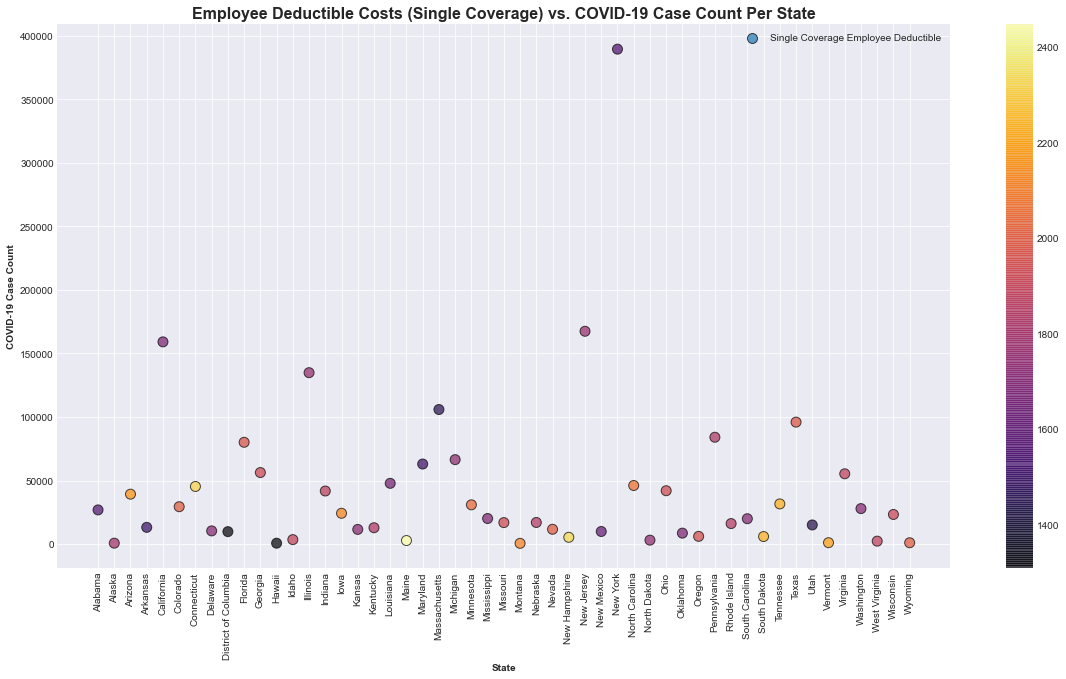

In [86]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Employee Deductible Costs (Single Coverage)'], cmap = 'inferno')
plt.title('Employee Deductible Costs (Single Coverage) vs. COVID-19 Case Count Per State', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Single Coverage Employee Deductible'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Employee Deductable Costs (Combined Average)

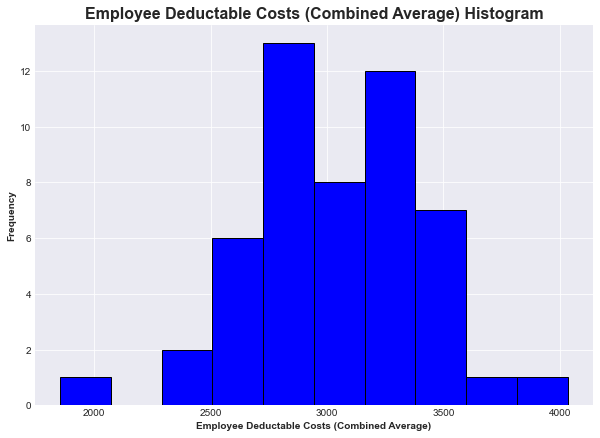

In [87]:
StatePremDF['Employee Deductable Costs (Combined Average)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employee Deductable Costs (Combined Average) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Deductable Costs (Combined Average)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

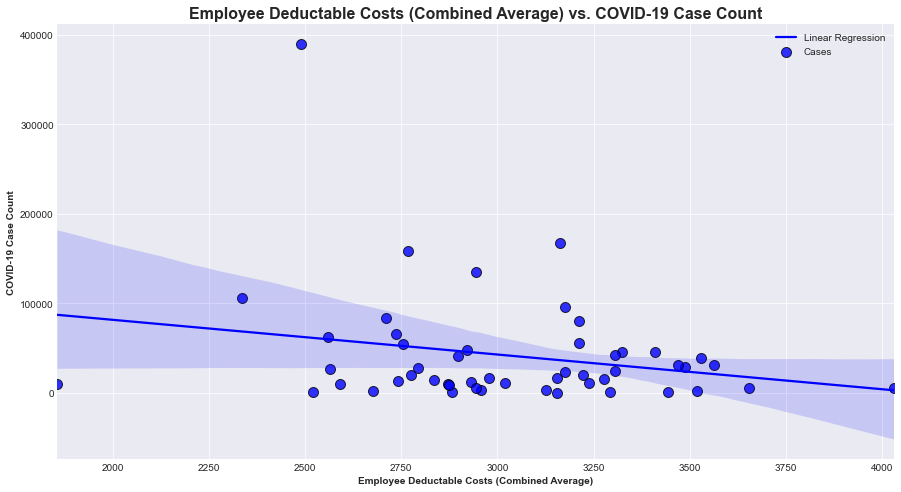

In [88]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employee Deductable Costs (Combined Average)', y = 'cases',
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employee Deductable Costs (Combined Average) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Employee Deductable Costs (Combined Average)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [89]:
model7 = sm.OLS(StatePremDF['cases'], StatePremDF['Employee Deductable Costs (Combined Average)']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.277
Model:                            OLS   Adj. R-squared (uncentered):              0.263
Method:                 Least Squares   F-statistic:                              19.19
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    6.05e-05
Time:                        19:24:24   Log-Likelihood:                         -636.99
No. Observations:                  51   AIC:                                      1276.
Df Residuals:                      50   BIC:                                      1278.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Employee Deductable Costs (Combined Average)    13.0556      2.980      4.381      0.000       7.070      19.041
==============================================================================
Omnibus:                       69.060   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              644.636
Skew:                           3.589   Prob(JB):                    1.04e-140
Kurtosis:                      18.870   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

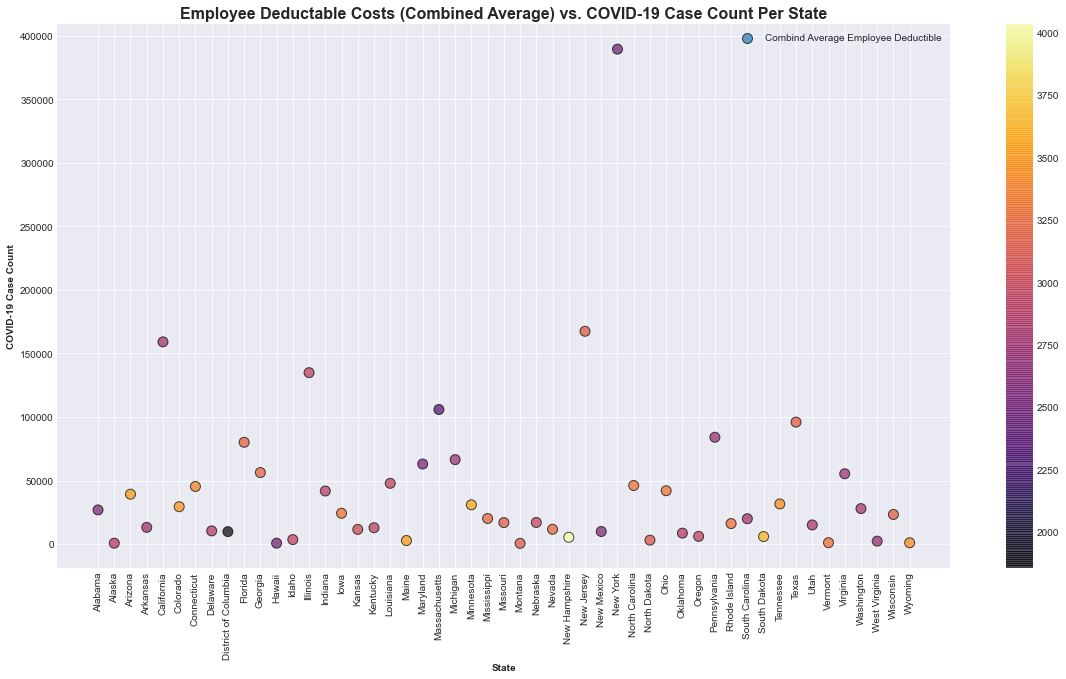

In [90]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Employee Deductable Costs (Combined Average)'], cmap = 'inferno')
plt.title('Employee Deductable Costs (Combined Average) vs. COVID-19 Case Count Per State', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Combind Average Employee Deductible'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

## Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)

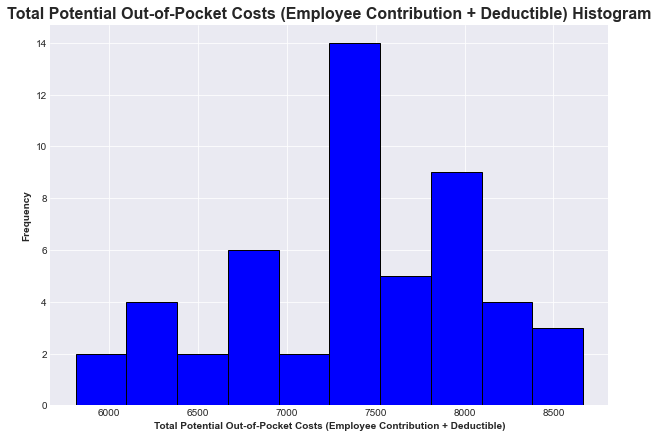

In [91]:
StatePremDF['Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible) Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

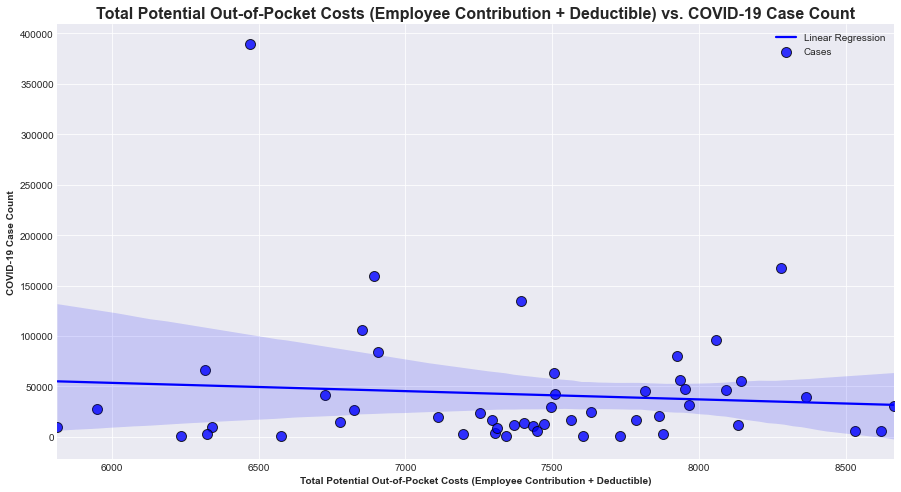

In [92]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)', y = 'cases',
            data = StatePremDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible) vs. COVID-19 Case Count', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [93]:
model8 = sm.OLS(StatePremDF['cases'], StatePremDF['Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.298
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              21.27
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    2.79e-05
Time:                        19:24:26   Log-Likelihood:                         -636.23
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)     5.5596      1.205      4.612      0.000       3.139       7.981
==============================================================================
Omnibus:                       70.557   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.165
Skew:                           3.676   Prob(JB):                    1.84e-151
Kurtosis:                      19.511   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

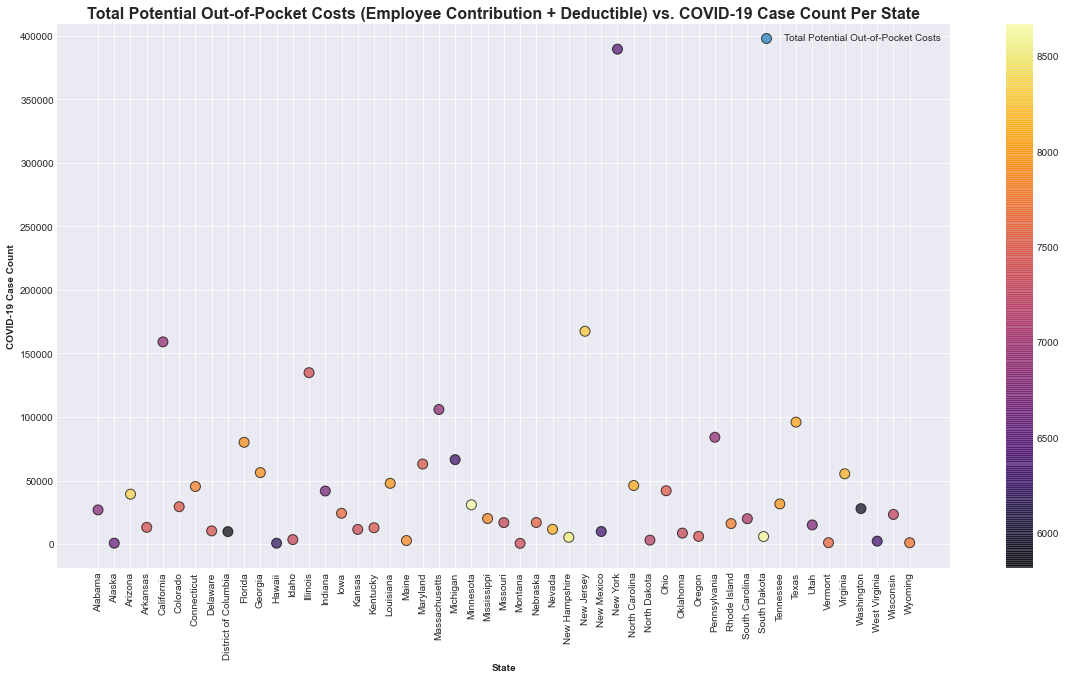

In [94]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = StatePremDF['State'] 
y = StatePremDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, 
            c = StatePremDF['Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible)'], cmap = 'inferno')
plt.title('Total Potential Out-of-Pocket Costs (Employee Contribution + Deductible) vs. COVID-19 Case Count Per State', 
          fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Potential Out-of-Pocket Costs'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [96]:
model9 = sm.OLS(StatePremDF['cases'], 
                StatePremDF[['Employer Sponsored Insurance Premium Costs (Single Coverage)', 
                             'Employer Sponsored Insurance Premium Costs (Family Coverage)',
                             'Employee Contribution to Premium Costs (Single Coverage)',
                             'Employee Contribution to Premium Costs (Family Coverage)',
                             'Employee Contribution to Premium Costs (Combined Average)',
                            'Employee Deductible Costs (Single Coverage)',
                            'Employee Deductable Costs (Combined Average)',]]).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.390
Method:                 Least Squares   F-statistic:                              5.667
Date:                Tue, 07 Jul 2020   Prob (F-statistic):                    0.000105
Time:                        19:25:44   Log-Likelihood:                         -628.88
No. Observations:                  51   AIC:                                      1272.
Df Residuals:                      44   BIC:                                      1285.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
Employer Sponsored Insurance Premium Costs (Single Coverage)   -24.9590     35.633     -0.700      0.487     -96.773      46.855
Employer Sponsored Insurance Premium Costs (Family Coverage)    19.0808     13.520      1.411      0.165      -8.167      46.329
Employee Contribution to Premium Costs (Single Coverage)        55.5519     52.704      1.054      0.298     -50.665     161.769
Employee Contribution to Premium Costs (Family Coverage)       -40.2983     37.331     -1.079      0.286    -115.533      34.937
Employee Contribution to Premium Costs (Combined Average)       39.0813     55.802      0.700      0.487     -73.379     151.542
Employee Deductible Costs (Single Coverage)                    -64.6777     66.272     -0.976      0.334    -198.240      68.885
Employee Deductable Costs (Combined Average)                   -23.1474     47.299     -0.489      0.627    -118.473      72.178
==============================================================================
Omnibus:                       55.301   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.783
Skew:                           2.782   Prob(JB):                     8.21e-76
Kurtosis:                      14.479   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""